# The Hanging Chain Project - Part I

The Hanging Chain Project is presented in the sections 13.8, 14.7, 15.4, 17.4, and 18.4 of the book [Numerical Optimization: Theoretical and Practical Aspects  (2006, second edition)](https://who.rocq.inria.fr/Jean-Charles.Gilbert/bgls/bgls.html), by J.F. Bonnans, J.Ch. Gilbert, C. Lemaréchal, and C.A. Sagastizábal, Springer. 

In this project, we propose to look at the problem of finding the static  equilibrium position of a chain made of rigid bars. The extreme joints of the chain are supposed to be fixed at two hooks and it is maintained above a given piecewise linear convex floor. The problem can be modeled as a minimization problem with equality and inequality constraints.

The hanging chain problem has been considered by several authors, with more or less generality and without the floor constraint. Luenberger (1984) introduces it "to illustrate a wide assortment of theoretical principles and practical techniques". Veselic (1995) provides a precise analysis of the problem. Bonnans and Shapiro (1998) use it as an example for a perturbation analysis. Select the button "References" in the menu for getting the full references.

Here I´m going to introduce two possible solutions (with or without a floor) using [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). It´s not the best possible solver out there, but for the sake of simplification and the "easy goingness" of scipy we´ll be able to get good enough solutions using two techniques:

* Reducing the constrained problem to a non-constrained using penalization techniques and using the 'BFGS' method.
* Using the non-linear constrained SLSQP method.

### The Mathematical Formulation

We suppose that the chain has perfectly flexible joints and is subject to gravity, so that it lies in the vertical plane containing the hooks. Let it be the (x, y)-plane. We assume that the chain has `nb` rigid bars of given lengths $L_i$, i = 1, . . . , nb. Therefore, there are `nj = nb − 1` free joints and `nk = nb + 1` joints.

The coordinates of the joints are denoted by $(x_i, y_i)$, for i = 1, . . . , nj. These ones are the n := 2(nj) variables to determine, since the position of the hooks is supposed to be given: at positions of coordinates ($x_0$, $y_0$) = (0, 0)
and ($x_{nb}$, $y_{nb}$) = (a, b) say, like the picture below.

![Hanging Chain Model](pic_1.PNG)

There is no restriction on the value of (a, b). For the sake of simplification, we´ll define the first restriction as (0, 0) by definition.

We start with the premise that the position of the chain can be obtained by minimizing its potential energy. Let us give its analytic expression.

Consider a chain whose bars have not necessarily the given lengths and that is specified by the position of its free joints. We gather them in the vector of unknowns

<br>
<center> $$x = (x_0, x_1, x_2 . . . , x_{nb}, y_0, y_1, . . . , y_{nj})$$ </center>


Since the $i^{th}$ bar is between the joints of coordinates ($x_{i-1}$, $y_{i-1}$) and ($x_i$ , $y_i$), its length is given by

<br>
<center>$$l_i(x) = \sqrt{(x_i - x_{i-1})^2 + (y_i - y_{i -1})^2} $$</center>


Therefore, assuming unit weight per unit of length, the potential energy of the considered chain, which is defined up to a constant, can be written

### Potential Energy - Expression

$$E(X) = \sum_{i=1}^{nb} l_i(x).\frac{y_i + y_{i-1} }{2} $$
<br>

### Defining the Constrains - Equality

The model must also specify the actual length of the bars: $l_i(x) = L_i.$
<br><br>
Squaring $l_i(x)$ to have differentiability leads to the constraints $c(x) = 0$
<br><br>
Where,

<center>$c_i(x) = l_i(x)^2 − L^2_i$ , for i = 1, . . . , nb.

### Defining the Constrains - Inequality

It is assumed that the floor is smooth, without roughness, so that the joints and the chain can slip on it without resistance. This implies that the actual equilibrium position is still the one with minimal potential energy. To simplify, we assume that the floor is flat and possibly tilted. In the (x, y) - plane, the floor is given by the affine function y = g(x), where

$$g(x) = g_0 + g_1x$$

The constants g0 and g1 are supposed given and may vary from one testproblem to another. The chain must hang in the half-plane $D := {(x, y) : y \geqslant g(x)}$.
<br><br>
In particular, the hooks must lie in D, which leads to the following compatibility conditions on $g_0$ and $g_1$:
<br><br>
<center>$$g_0 \leqslant 0 $$  and $$g_0 + g_1a \leqslant b $$</center>
<br><br>    
Then, since the chain is affine between its joints, it is entirely in D if $c_i(x)$ $\leqslant$ 0 $\in$ $R_{nj}$, where
<br><br>
<center> $z_i(x)$ = $g_0$ + $g_1$$x_{i−nb}$ − $y_{i−nb}$ </center>

### Summarizing

Finally, the problem to solve can be written:
$$\begin{equation}
    \begin{cases}
        \min{E(x)} & - & \text{Objective Function}  \\
        c_i(x) = 0 & - & \text{Equality Constrains}  \\
        z_i(x) \leqslant 0 & - & \text{Inequality Constrains}\\
    \end{cases}
\end{equation}$$

### The Solution

Let´s import all the needed libraries and functions and after a first glance at the results take a further look into the code and formulation envolved

In [1]:
#Algebra and Calculus
import numpy as np

In [2]:
#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from hanging_chain import hang_chain

### Toy Example 1 

1. 4 bars
2. Constant lenght 2
3. Fixed point (a, b) = (a, 0)

**Inputs:**

* Second Constrained Knot Cordinates
* Bar Length
* Number of Bars - nb

In [4]:
toy_bar = 2 * np.ones(4)
a = 5
b = 0
nb1 = len(toy_bar)

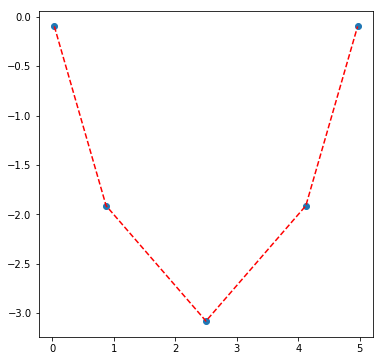

Joints - x coordinates 
 [0.03378409 0.87565627 2.49999931 4.12434164 4.96621572]

Joints - y coordinates 
 [-0.09707694 -1.91137438 -3.07830601 -1.91137339 -0.09707682]

Calculated Length of the Bars 
 [2.000106   2.00005493 2.00005493 2.000106  ]


In [5]:
xf, yf, fbars = hang_chain(x1= a, y1= b, lb=toy_bar, nb=nb1)

print('Joints - x coordinates \n', xf)
print('\nJoints - y coordinates \n', yf)
print('\nCalculated Length of the Bars \n', fbars)

As we can see above, with one line of code, we get:
* The x-y coordinates of the joints
* The calculated lenght of the bars definied by the calculated joints
* A plot of the final position of the bars

Lets defined a higher number of bars with random sizes

### Toy Example 2 

1. 15 bars
2. Random lenghts between 2 and 10
3. Fixed point (a, b) = (20, -10)

**Inputs:**

* Second Constrained Knot Cordinates
* Bar Length
* Number of Bars - nb

In [6]:
toy_bar2 = np.random.randint(2, 10, 15)
a = 20
b = -10
nb2 = len(toy_bar2)

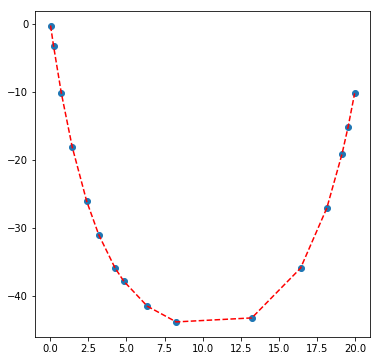

Initial Length of the bars 
 [3 7 8 8 5 5 2 4 3 5 8 9 8 4 5]

Joints - x coordinates 
 [1.44889845e-02 2.10500554e-01 7.24287714e-01 1.44415266e+00
 2.38942012e+00 3.18202177e+00 4.25246083e+00 4.81798949e+00
 6.36390343e+00 8.26691433e+00 1.32321866e+01 1.64329642e+01
 1.81541673e+01 1.91501868e+01 1.95493062e+01 1.99829413e+01]

Joints - y coordinates 
 [ -0.22842075  -3.22265672 -10.20388152 -18.17149409 -26.11550264
 -31.05237835 -35.93652327 -37.85525214 -41.54451257 -43.86376863
 -43.27536032 -35.94356243 -27.10965612 -19.17185365 -15.19157635
 -10.21024007]

Calculated Length of the Bars 
 [3.00064486 7.00010549 8.00006598 8.00005016 5.00009591 5.00007113
 2.00033576 4.00006155 3.00006653 5.0000153  8.00001483 9.00002451
 8.00004767 4.00023796 5.00017505]


In [7]:
xf, yf, fbars = hang_chain(x1= a, y1= b, lb=toy_bar2, nb=nb2)

print('Initial Length of the bars \n', toy_bar2)
print('\nJoints - x coordinates \n', xf)
print('\nJoints - y coordinates \n', yf)
print('\nCalculated Length of the Bars \n', fbars)